In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif"
})
plt.rcParams['font.size'] = '12'  # 16

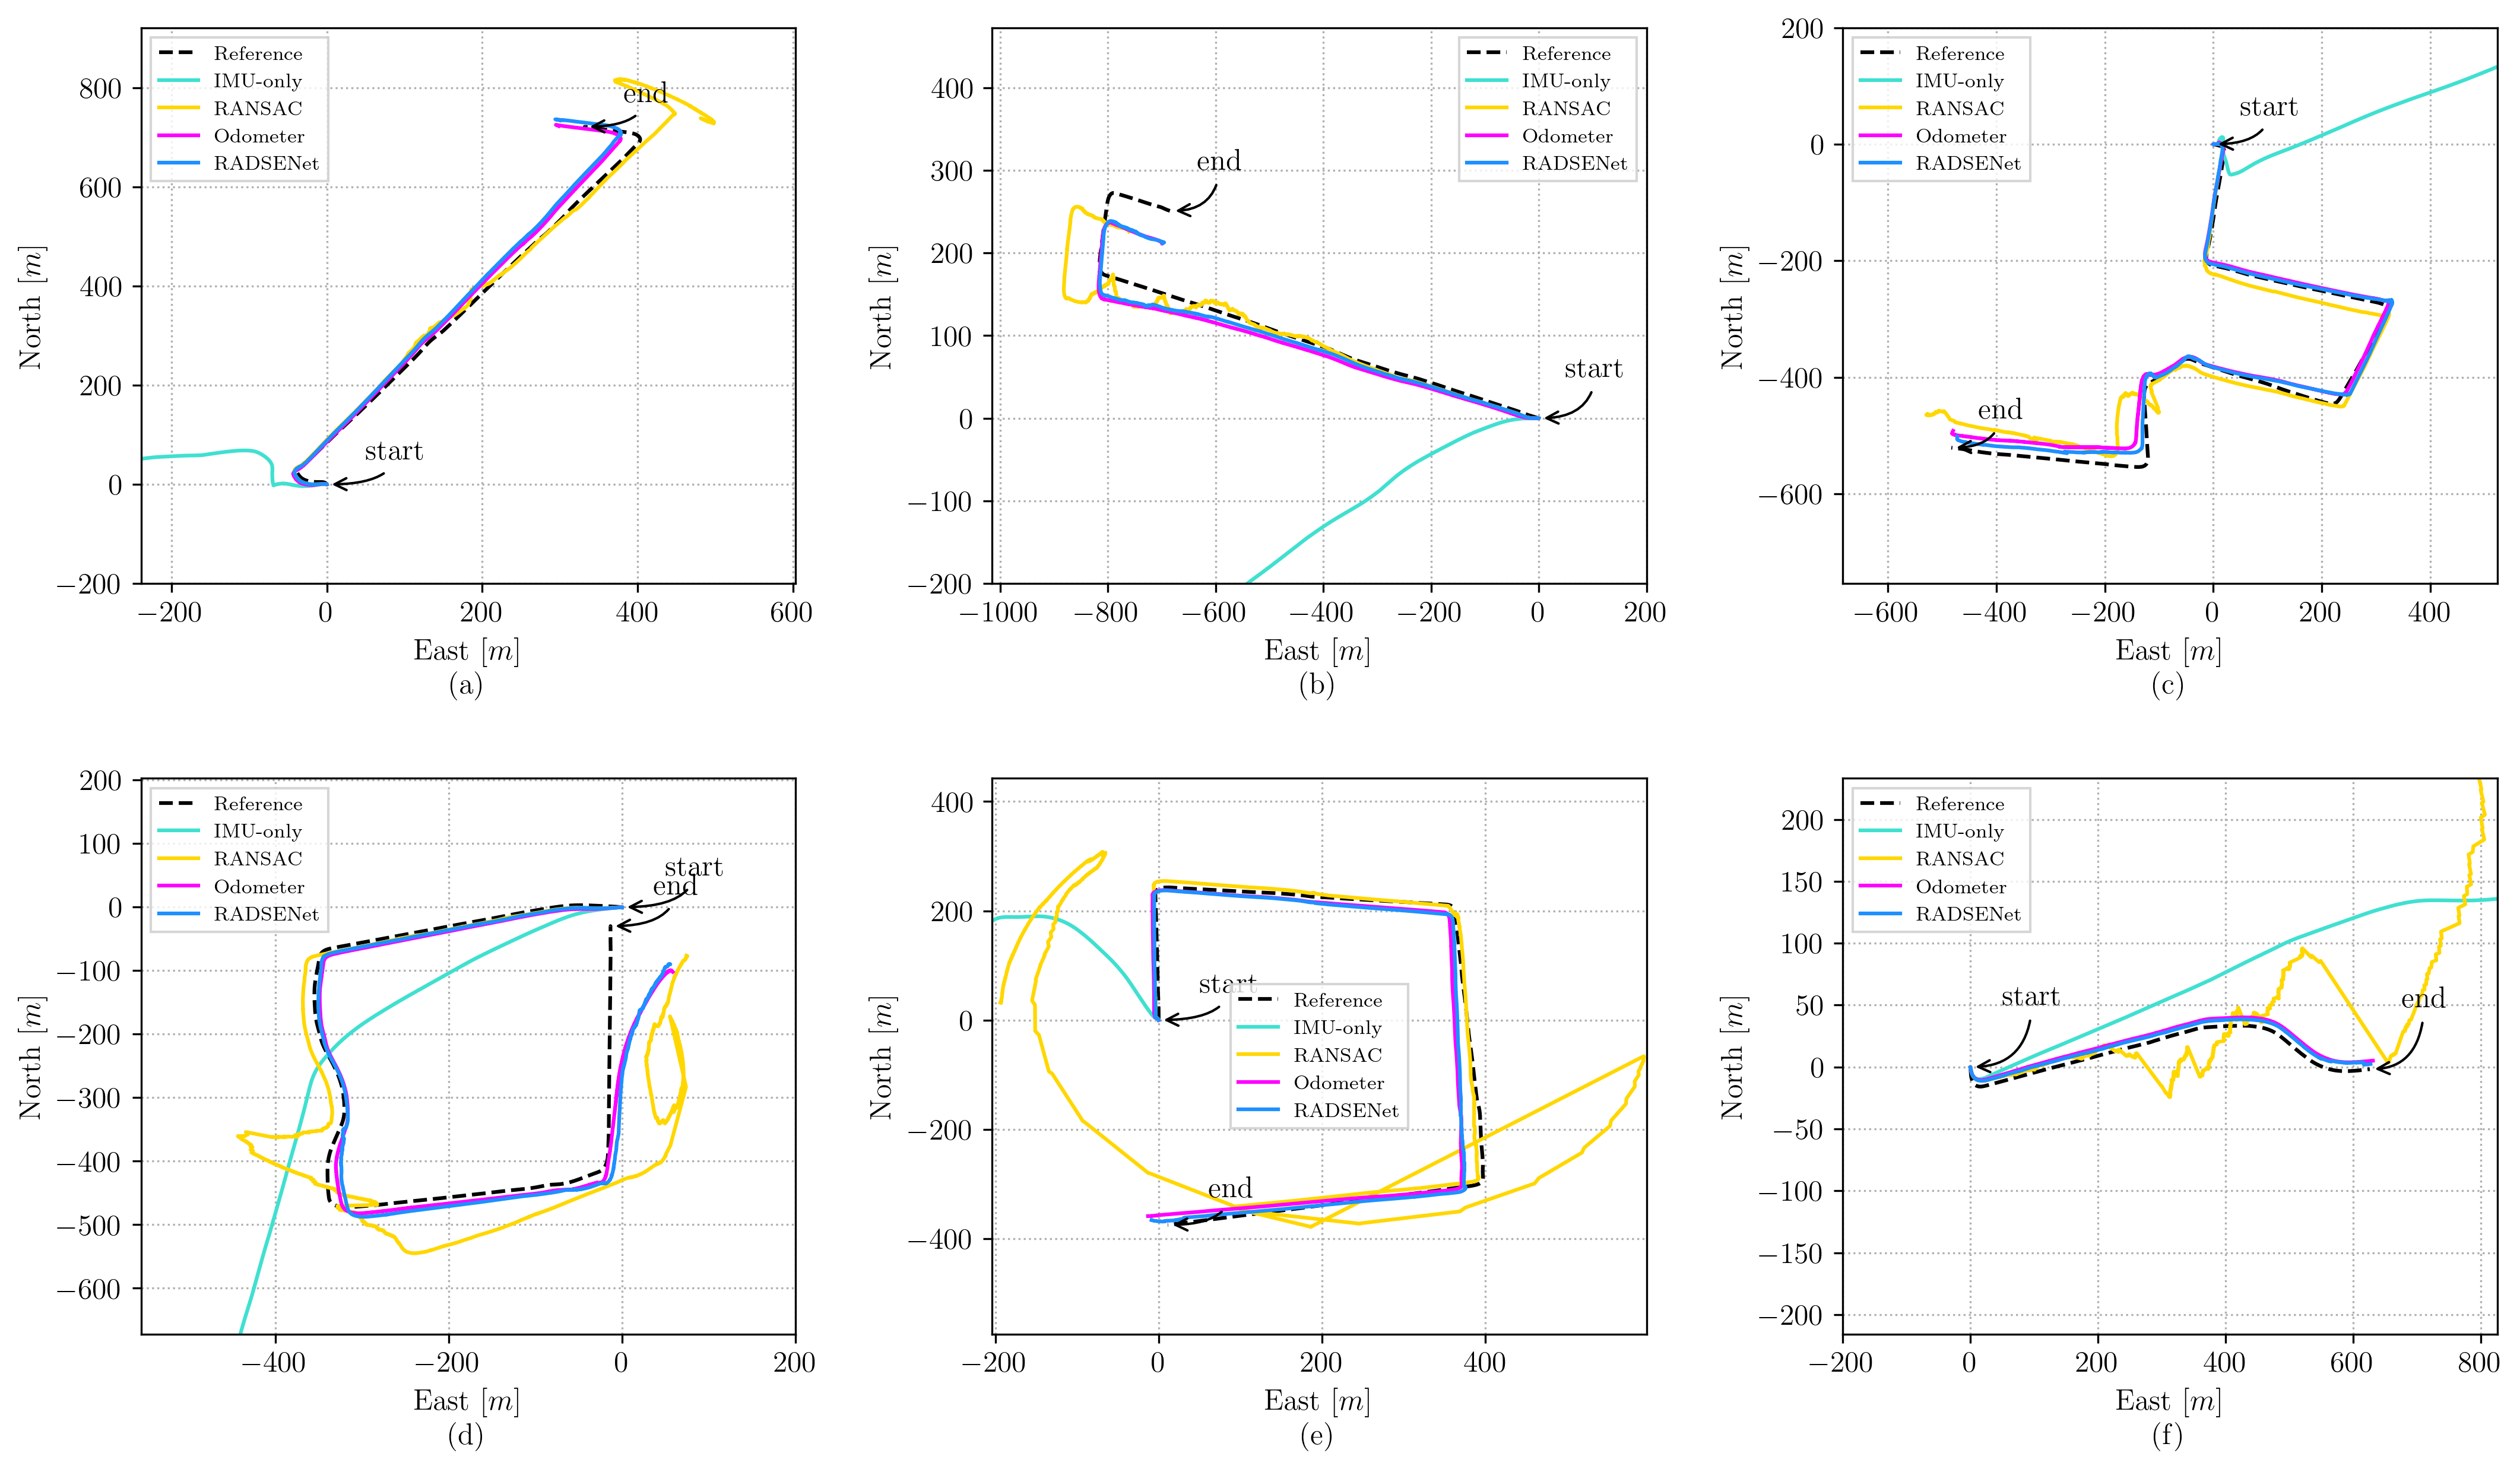

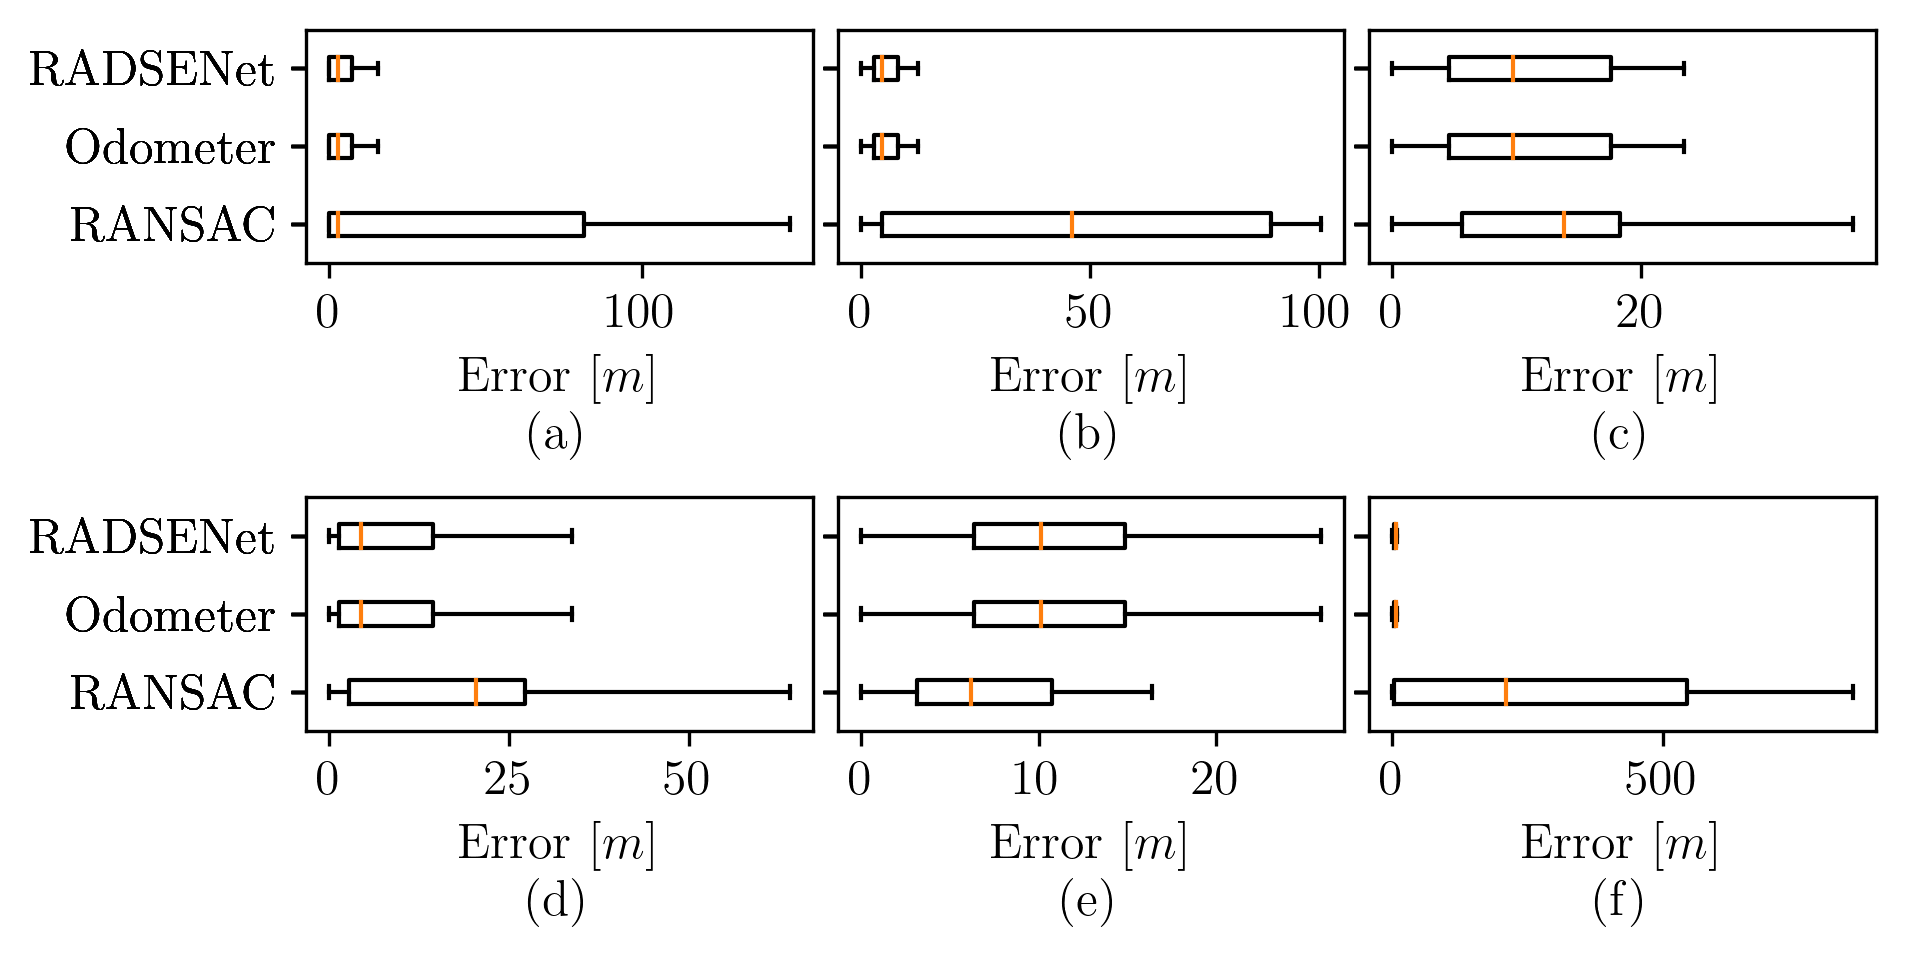

In [6]:
fig, [a,b] = plt.subplots(2,3,figsize=[14, 8]);
plt.tight_layout()
plt.subplots_adjust(hspace=0.35, wspace=0.3)
fig2, [c,d] = plt.subplots(2,3,figsize=[6, 3], sharey=True);
plt.tight_layout()
plt.subplots_adjust(hspace=1, wspace=0.05)  # hspace=1
axis = a.tolist() + b.tolist()
axis2 = c.tolist() + d.tolist()
labels = ['a','b','c','d','e','f']

for i in range(1,7):
    # Reference
    path = os.path.join('../output', 'Seq0'+str(i), 'ref.txt')
    array = np.loadtxt(path)
    label = labels.pop(0)
    axis[i-1].plot(-array[:,3], array[:,11], '--k', label='Reference')
    axis[i-1].set_xlim(left=np.min(-array[:,3])-200, right=np.max(-array[:,3])+200)
    axis[i-1].set_ylim(bottom=np.min(array[:,11])-200, top=np.max(array[:,11])+200)
    axis[i-1].annotate('start', xy=(-array[0,3], array[0,11]), xytext=(-array[0,3]+50, array[0,11]+50), xycoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="angle3"))
    axis[i-1].annotate('end', xy=(-array[-1,3], array[-1,11]), xytext=(-array[-1,3]+50, array[-1,11]+50), xycoords='data', arrowprops=dict(arrowstyle="->", connectionstyle="angle3")) 
    axis[i-1].grid(linestyle=':')
    axis[i-1].set_xlabel(f'East [$m$] \n ({label})')
    axis[i-1].set_ylabel('North [$m$]')
    ref_pos = np.sqrt(np.square(-array[:,3]) + np.square(array[:,11]) + np.square(array[:,7]))
        
    # IMU
    path = os.path.join('../output', 'Seq0'+str(i), 'imu.txt')
    array = np.loadtxt(path)
    axis[i-1].plot(-array[:,3], array[:,11], 'turquoise', label='IMU-only')
    imu_pos = np.sqrt(np.square(-array[:,3]) + np.square(array[:,11]) + np.square(array[:,7]))
    
    # RANSAC
    path = os.path.join('../output', 'Seq0'+str(i), 'imu-ransac.txt')
    array = np.loadtxt(path)
    axis[i-1].plot(-array[:,3], array[:,11], 'gold', label='RANSAC')
    ransac_pos = np.sqrt(np.square(-array[:,3]) + np.square(array[:,11]) + np.square(array[:,7]))
    
    # Odometer
    path = os.path.join('../output', 'Seq0'+str(i), 'imu-odom.txt')
    array = np.loadtxt(path)
    axis[i-1].plot(-array[:,3], array[:,11], 'magenta', label='Odometer')
    odom_pos = np.sqrt(np.square(-array[:,3]) + np.square(array[:,11]) + np.square(array[:,7]))

    # Radar
    path = os.path.join('../output', 'Seq0'+str(i), 'imu-radar.txt')
    array = np.loadtxt(path)
    axis[i-1].plot(-array[:,3], array[:,11], 'dodgerblue', label='RADSENet')
    radar_pos = np.sqrt(np.square(-array[:,3]) + np.square(array[:,11]) + np.square(array[:,7]))
    
    axis[i-1].legend(fontsize=8, fancybox=False)
    
    # Box plots
    data = [np.abs(ref_pos-ransac_pos), np.abs(ref_pos-radar_pos), np.abs(ref_pos-radar_pos)]
    axis2[i-1].boxplot(data, labels=['RANSAC','Odometer','RADSENet'], vert=False, showfliers=False)
    axis2[i-1].set_xlabel(f'Error [$m$] \n ({label})')
    